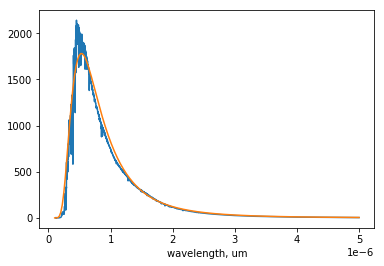

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy import optimize

raw_dir = '.\challenge_raw'


c = 3.00e8
h = 6.63e-34
kb = 1.38e-23

def Bspec(wv,temp):
    pref = (2*h*c**2)/(wv**5)
    expo = (h*c)/(wv*kb*temp)
    
    B = pref*(np.exp(expo)-1)**(-1)
    
    return B

wv = np.linspace(100e-9,5000e-9,200)
Bsun = Bspec(wv,5778)
#plt.plot(wv,B)

# source: https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html
sun_df= pd.read_csv('./challenge_raw/rawdata_Sun.csv')


def Bfit(wv,A,temp):
    pref = A/(wv**5)
    expo = (h*c)/(wv*kb*temp)
    B = pref*(np.exp(expo)-1)**(-1)
    return B


# plt.plot(sun_df['wv,m'],sun_df['B'])
# plt.show()

params, params_covariance = optimize.curve_fit(Bfit, sun_df['wv,m'],sun_df['B'],
                                               p0=[1e-9,3000])
#print(params)

Bcheck = Bfit(wv,params[0],params[1])
plt.plot(sun_df['wv,m'],sun_df['B'])
plt.plot(wv,Bcheck)
plt.xlabel('wavelength, um')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()